In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import sys

sys.path.append("../")

In [58]:
import os
import torch

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [59]:
# read jsons from directory
import json

results = []

for root, dirs, files in os.walk("../data/calibration"):
    for file in files:
        if file.endswith(".json"):
            with open(os.path.join(root, file), "r") as f:
                results.extend(json.load(f))

In [77]:
import pandas as pd

df = pd.DataFrame(results).drop_duplicates(["model", "dataset"])
df["last_es"] = df["es"].apply(lambda x: x[-1])
df["model"] = df["model"].apply(lambda x: x.split("/")[-1])

df = df[df["model"] != "Llama-2-13b-hf"]

In [78]:
df.head(3)

,model,dataset,acc,ece,es,labels,probs,gts,entropies,last_es
0,Llama-2-7b-hf,high_school_biology,0.358065,0.631918,"[0.3717489627271083, 0.34795036355471415, 0.00...","[0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 2, 1, 0, 0, 3, ...","[[0.3647712411496889, 0.2684052718865447, 0.12...","[0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 3, 3, 3, ...",{'unnormalized_entropy': {'hidden_state_0': [3...,0.332304
2,Llama-2-7b-hf,high_school_chemistry,0.182266,0.587534,"[0.35818230672235285, 0.33741641735907524, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.3292156284274312, 0.1989487725213138, 0.14...","[0, 0, 2, 0, 1, 2, 2, 3, 2, 0, 2, 0, 2, 0, 3, ...",{'unnormalized_entropy': {'hidden_state_0': [3...,0.326364
5,Llama-2-7b-hf,high_school_computer_science,0.340000,0.581525,"[0.38357537044407125, 0.36107190521846777, 0.0...","[0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 3, 2, 0, 1, 2, ...","[[0.5982722046956919, 0.17410712920510826, 0.1...","[2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, ...",{'unnormalized_entropy': {'hidden_state_0': [2...,0.343472


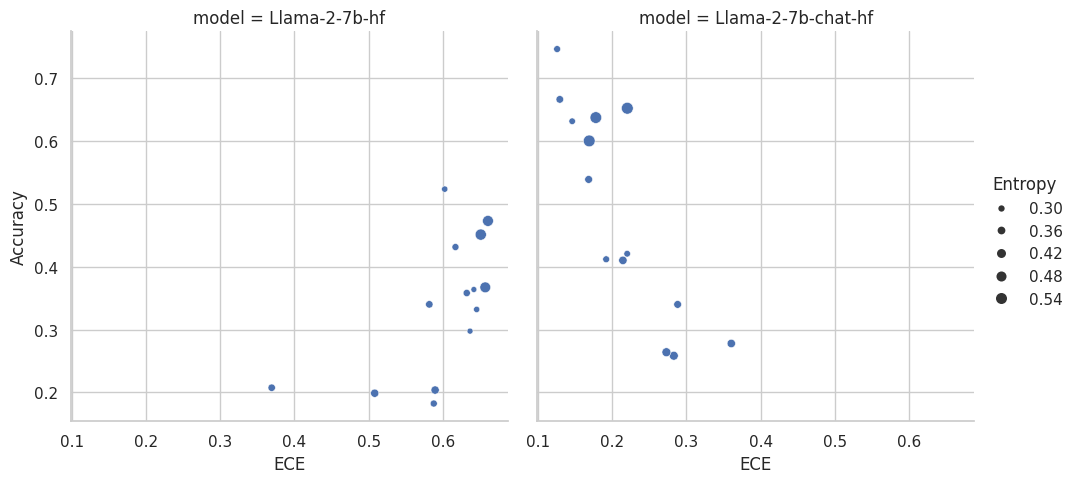

In [79]:
import seaborn as sns


ax1 = sns.relplot(
    data=df,
    x="ece",
    y="acc",
    col="model",
    size="last_es",
    legend=True
)
ax1._legend.set_title('Entropy')
ax1.set(xlabel='ECE', ylabel='Accuracy')

In [80]:
df.head()

,model,dataset,acc,ece,es,labels,probs,gts,entropies,last_es
0,Llama-2-7b-hf,high_school_biology,0.358065,0.631918,"[0.3717489627271083, 0.34795036355471415, 0.00...","[0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 2, 1, 0, 0, 3, ...","[[0.3647712411496889, 0.2684052718865447, 0.12...","[0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 3, 3, 3, ...",{'unnormalized_entropy': {'hidden_state_0': [3...,0.332304
2,Llama-2-7b-hf,high_school_chemistry,0.182266,0.587534,"[0.35818230672235285, 0.33741641735907524, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.3292156284274312, 0.1989487725213138, 0.14...","[0, 0, 2, 0, 1, 2, 2, 3, 2, 0, 2, 0, 2, 0, 3, ...",{'unnormalized_entropy': {'hidden_state_0': [3...,0.326364
5,Llama-2-7b-hf,high_school_computer_science,0.340000,0.581525,"[0.38357537044407125, 0.36107190521846777, 0.0...","[0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 3, 2, 0, 1, 2, ...","[[0.5982722046956919, 0.17410712920510826, 0.1...","[2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, ...",{'unnormalized_entropy': {'hidden_state_0': [2...,0.343472
9,Llama-2-7b-hf,high_school_european_history,0.472727,0.660488,"[0.566286135241198, 0.5321061854266655, 0.0426...","[2, 3, 3, 3, 0, 3, 2, 3, 0, 3, 3, 1, 3, 3, 0, ...","[[0.17963923122215678, 0.2513695128047399, 0.3...","[2, 0, 3, 1, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, 3, ...",{'unnormalized_entropy': {'hidden_state_0': [4...,0.526678
14,Llama-2-7b-hf,high_school_geography,0.363636,0.641530,"[0.3237784205738905, 0.30093887221122834, 0.00...","[0, 3, 0, 1, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[[0.29615049619071543, 0.27263430081547263, 0....","[1, 3, 2, 0, 3, 3, 3, 2, 0, 3, 0, 1, 0, 3, 1, ...",{'unnormalized_entropy': {'hidden_state_0': [2...,0.285088


In [82]:
# Transform the DataFrame
long_df = df.explode('es')
long_df['hidden_state'] = long_df.groupby(['model', 'dataset']).cumcount()
long_df = long_df.rename(columns={'es': 'entropy'})

# Create a size scale
min_size = 20
max_size = 200
long_df['size'] = min_size + (long_df['acc'] - long_df['acc'].min()) / (long_df['acc'].max() - long_df['acc'].min()) * (max_size - min_size)


/tmp/ipykernel_3980988/997986756.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


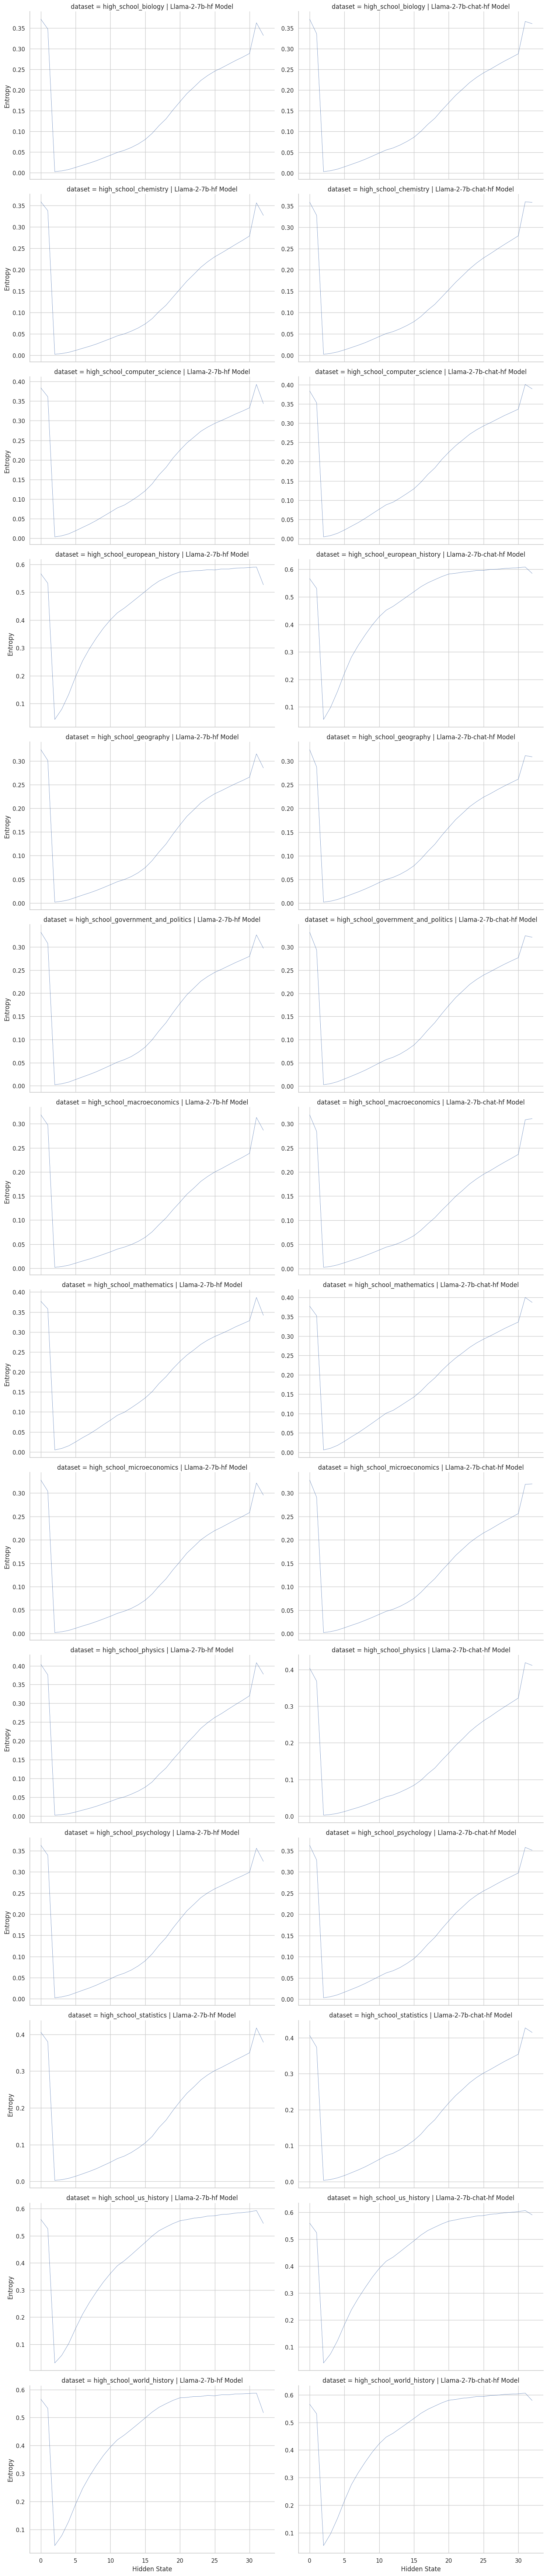

In [85]:
# Plot using Seaborn relplot
sns.set(style="whitegrid")
g = sns.relplot(
    data=long_df,
    x='hidden_state', y='entropy', #hue='model', size='size',
    kind='line', col='model', row='dataset', facet_kws={'sharey': False, 'sharex': True},
    palette='tab10', sizes=(min_size, max_size), height=5, aspect=1.5, linewidth=0.5
)

g.set_axis_labels("Hidden State", "Entropy")
g.set_titles(col_template="{col_name} Model")